In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ball = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
df_matches = pd.read_csv("IPL Matches 2008-2020.csv")

In [4]:
df_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
print("\nNo. of Rows and Columns :\n")
print("IPL Ball-by-Ball 2008-2020 :",df_ball.shape)
print("IPL Matches 2008-2020.csv :",df_matches.shape)


No. of Rows and Columns :

IPL Ball-by-Ball 2008-2020 : (193468, 18)
IPL Matches 2008-2020.csv : (816, 17)


In [7]:
print(df_ball.info())
print("\n")
print(df_matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
# Check for null values

In [9]:
df_ball.isnull().sum().sort_values(ascending=False)

fielder             186684
player_dismissed    183973
dismissal_kind      183973
extras_type         183235
bowling_team           191
inning                   0
batting_team             0
is_wicket                0
non_boundary             0
id                       0
extra_runs               0
batsman_runs             0
bowler                   0
non_striker              0
batsman                  0
ball                     0
over                     0
total_runs               0
dtype: int64

In [10]:
(df_ball.isnull().mean()*100).sort_values(ascending=False)

fielder             96.493477
player_dismissed    95.092212
dismissal_kind      95.092212
extras_type         94.710753
bowling_team         0.098724
inning               0.000000
batting_team         0.000000
is_wicket            0.000000
non_boundary         0.000000
id                   0.000000
extra_runs           0.000000
batsman_runs         0.000000
bowler               0.000000
non_striker          0.000000
batsman              0.000000
ball                 0.000000
over                 0.000000
total_runs           0.000000
dtype: float64

### Columns with High Null Values:

    - fielder (96.5%)

    - player_dismissed (95.1%)

    - dismissal_kind (95.1%)

    - extras_type (94.7%)

These all relate to events that don't happen on every ball, like dismissals and extras. So it's totally expected that most rows will be null for these fields.

**No need to drop**

⚠️ Bowling_team has 0.1% nulls value because not every team plays in Semi-Final and Final.

In [11]:
df_matches.isnull().sum().sort_values(ascending=False)

method             797
result_margin       17
city                13
winner               4
player_of_match      4
eliminator           4
result               4
id                   0
umpire1              0
toss_winner          0
toss_decision        0
team2                0
team1                0
neutral_venue        0
venue                0
date                 0
umpire2              0
dtype: int64

In [12]:
(df_matches.isnull().mean()*100).sort_values(ascending=False)

method             97.671569
result_margin       2.083333
city                1.593137
winner              0.490196
player_of_match     0.490196
eliminator          0.490196
result              0.490196
id                  0.000000
umpire1             0.000000
toss_winner         0.000000
toss_decision       0.000000
team2               0.000000
team1               0.000000
neutral_venue       0.000000
venue               0.000000
date                0.000000
umpire2             0.000000
dtype: float64

In [13]:
df_matches['method'] = df_matches['method'].fillna('UnKnown')

df_matches['result_margin'] = df_matches['result_margin'].fillna(0)

df_matches['city'] = df_matches['city'].fillna('Not Played')

df_matches['eliminator'] = df_matches['eliminator'].fillna('UnKnown')

**winner , player_of_match, result**  (all ~0.5–1.5%)

These might be missing for:

- No result games

- Abandoned matches




In [14]:
# Change Datatype of Date column

df_matches["date"] = pd.to_datetime(df_matches["date"], errors = 'coerce')

df_matches["Year"] = pd.to_datetime(df_matches["date"]).dt.year

--------------

## Data Merging

In [15]:
ipl_df = pd.merge(df_ball, df_matches, left_on='id', right_on='id', how='left')

ipl_df.shape

(193468, 35)

In [16]:
ipl_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Year
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,UnKnown,Asad Rauf,RE Koertzen,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,UnKnown,Asad Rauf,RE Koertzen,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,UnKnown,Asad Rauf,RE Koertzen,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,UnKnown,Asad Rauf,RE Koertzen,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,UnKnown,Asad Rauf,RE Koertzen,2008


In [17]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                193468 non-null  int64         
 1   inning            193468 non-null  int64         
 2   over              193468 non-null  int64         
 3   ball              193468 non-null  int64         
 4   batsman           193468 non-null  object        
 5   non_striker       193468 non-null  object        
 6   bowler            193468 non-null  object        
 7   batsman_runs      193468 non-null  int64         
 8   extra_runs        193468 non-null  int64         
 9   total_runs        193468 non-null  int64         
 10  non_boundary      193468 non-null  int64         
 11  is_wicket         193468 non-null  int64         
 12  dismissal_kind    9495 non-null    object        
 13  player_dismissed  9495 non-null    object        
 14  fiel

In [29]:
ipl_df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team', 'city', 'date', 'player_of_match',
       'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'eliminator',
       'method', 'umpire1', 'umpire2', 'Year'],
      dtype='object')

1.Perform basic analysis on IPL 
2.Analyse toss decisions across seasons of IPl 
3.Analyse whether winning toss applies winning game or not 
4.Analyse which teams have won the tournament the most 
5.Comparitive analysis of teams

In [24]:
# Total number of Team participate in each season

ipl_df.groupby(["Year"])["team1"].nunique()

Year
2008     8
2009     7
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
2018     8
2019     8
2020     8
Name: team1, dtype: int64

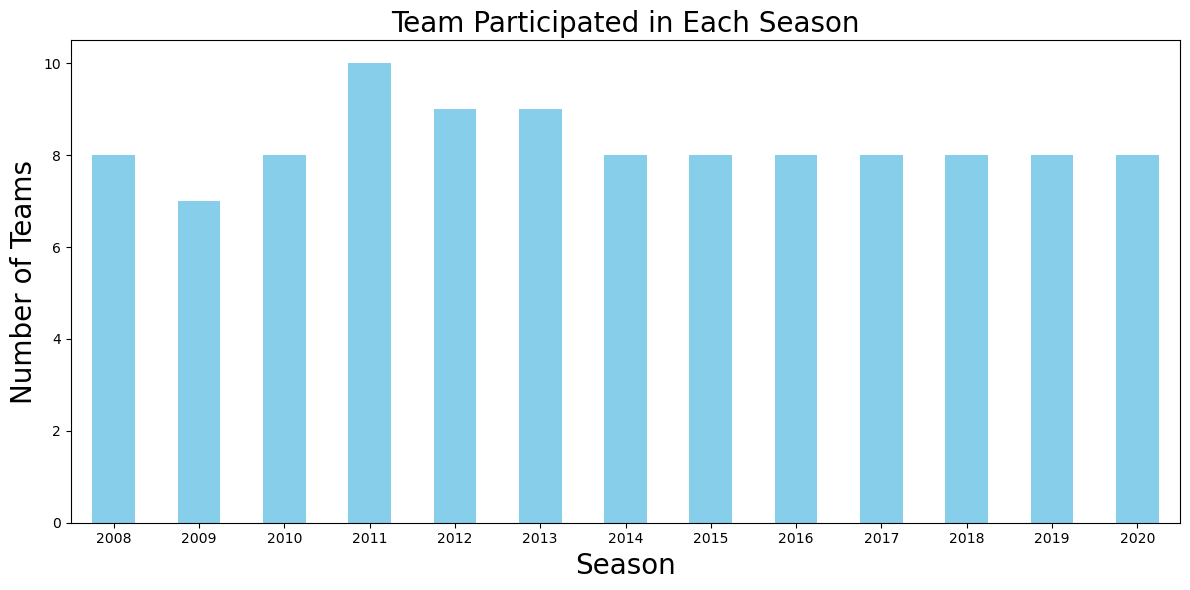

In [36]:
season_participation = ipl_df.groupby(["Year"])["team1"].nunique()

plt.figure(figsize=(12, 6))
season_participation.plot(kind='bar', color='skyblue')
plt.title('Team Participated in Each Season', size=20)
plt.xlabel('Season', size=20)
plt.ylabel('Number of Teams', size=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [23]:
# Total number of Team Played in each season

ipl_df.groupby(["Year"])["team1"].count()

Year
2008    13489
2009    13595
2010    14489
2011    17013
2012    17767
2013    18152
2014    14288
2015    13641
2016    14096
2017    13849
2018    14286
2019    14293
2020    14510
Name: team1, dtype: int64

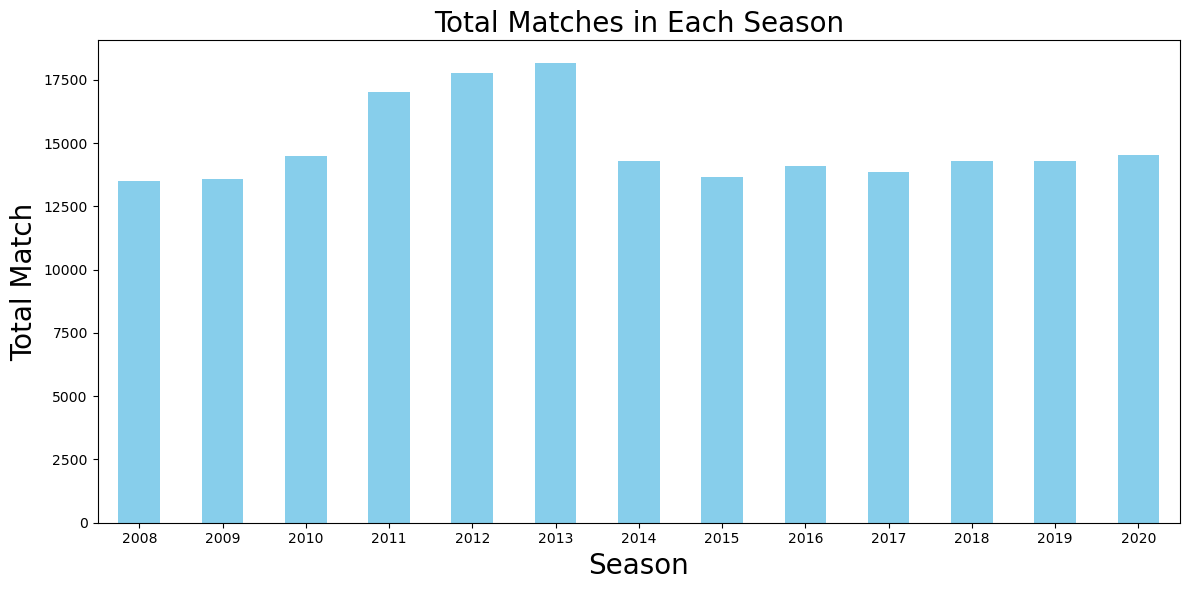

In [40]:
total_matches_play = ipl_df.groupby(["Year"])["team1"].count()

plt.figure(figsize=(12, 6))
total_matches_play.plot(kind='bar', color='skyblue')
plt.title('Total Matches in Each Season', size=20)
plt.xlabel('Season', size=20)
plt.ylabel('Total Match', size=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [46]:
# Total City & Venue

print("No. of Cities :", ipl_df["city"].nunique())  
print("No. of Venue's :",ipl_df["venue"].nunique())

No. of Cities : 33
No. of Venue's : 36


In [26]:
# Total Matches played in each venue 

ipl_df.groupby(['city','venue'])["team1"].count().sort_values(ascending=False).head(10)

city        venue                                     
Kolkata     Eden Gardens                                  17988
Mumbai      Wankhede Stadium                              17584
Delhi       Feroz Shah Kotla                              17294
Hyderabad   Rajiv Gandhi International Stadium, Uppal     15200
Bangalore   M Chinnaswamy Stadium                         14895
Chennai     MA Chidambaram Stadium, Chepauk               13881
Jaipur      Sawai Mansingh Stadium                        11150
Chandigarh  Punjab Cricket Association Stadium, Mohali     8266
Abu Dhabi   Sheikh Zayed Stadium                           6906
Dubai       Dubai International Cricket Stadium            6338
Name: team1, dtype: int64

In [27]:
# Top Player of the match

ipl_df.groupby(['player_of_match'])["player_of_match"].count().sort_values(ascending=False).head(10)

player_of_match
AB de Villiers    5663
CH Gayle          5186
RG Sharma         4412
MS Dhoni          4130
DA Warner         4076
SR Watson         3807
YK Pathan         3724
SK Raina          3400
G Gambhir         3107
AM Rahane         2916
Name: player_of_match, dtype: int64

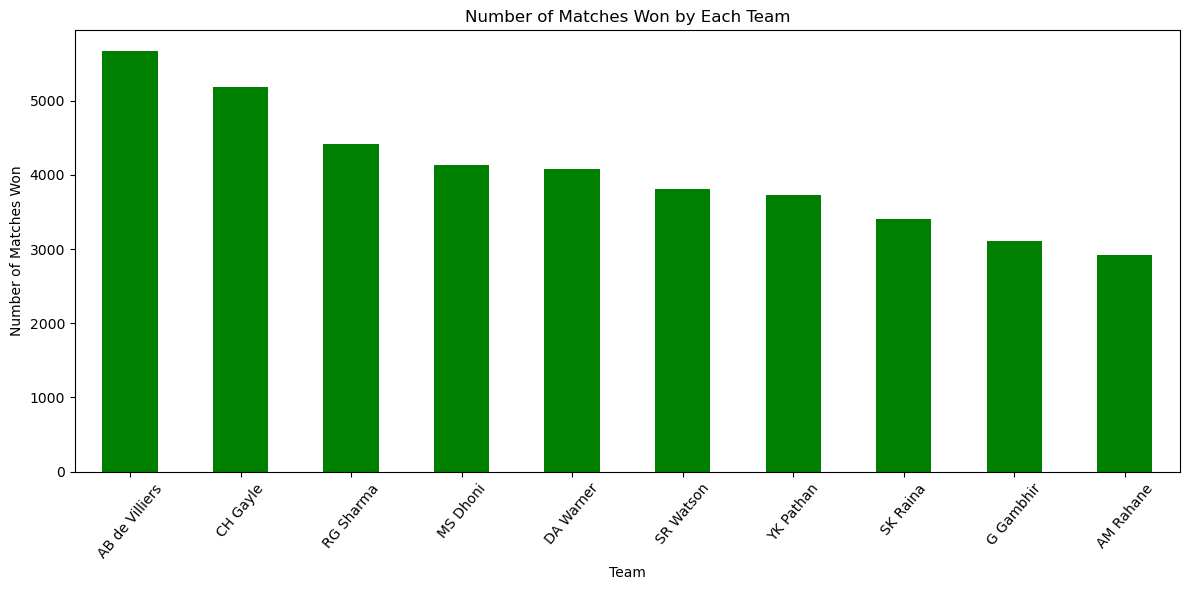

In [43]:
Top_Player = ipl_df.groupby(['player_of_match'])["player_of_match"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
Top_Player.plot(kind='bar', color='green')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [59]:
# Top Team Win by each session

ipl_df.groupby("Year")['winner'].count()


Year
2008    13489
2009    13595
2010    14489
2011    16950
2012    17767
2013    18152
2014    14288
2015    13383
2016    14096
2017    13849
2018    14286
2019    14242
2020    14510
Name: winner, dtype: int64

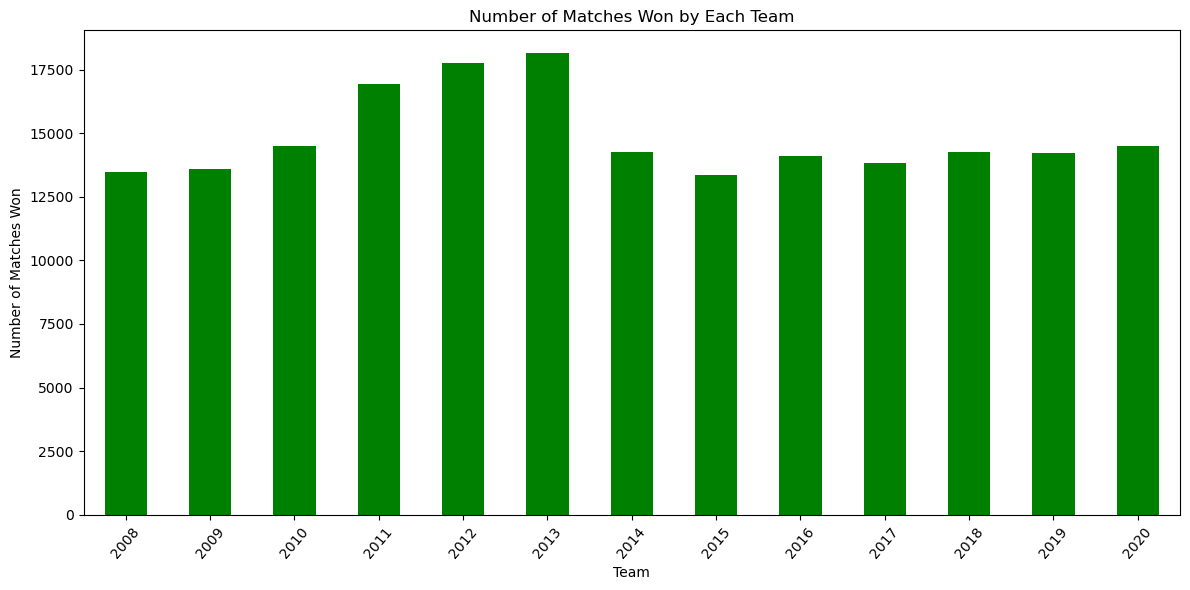

In [60]:
win = ipl_df.groupby("Year")['winner'].count()

plt.figure(figsize=(12, 6))
win.plot(kind='bar', color='green')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [ ]:
# Analyse toss decisions across seasons of IPl 

In [31]:
toss_decision_by_season = ipl_df.groupby(['Year', 'toss_decision']).size().unstack()

toss_decision_by_season

toss_decision,bat,field
Year,,
2008,5973,7516
2009,8420,5175
2010,9384,5105
2011,5682,11331
2012,8988,8779
2013,10796,7356
2014,4562,9726
2015,5932,7709
2016,2531,11565


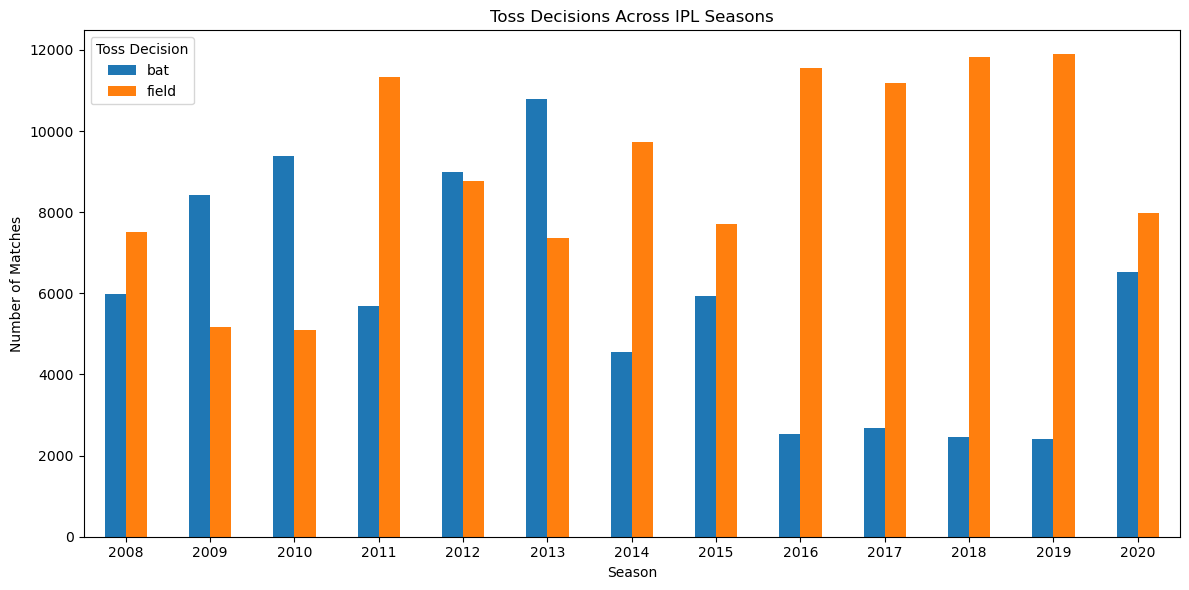

In [37]:
toss_decision_by_season.plot(kind='bar', figsize=(12,6))
plt.title('Toss Decisions Across IPL Seasons')
plt.ylabel('Number of Matches')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [75]:
# Analyse whether winning toss applies winning game or not 

In [81]:
ipl_df['toss_win_and_match_win'] = ipl_df['toss_winner'] == ipl_df['winner']

seasonal_stats = ipl_df.groupby('Year')['toss_win_and_match_win'].mean() * 100

print(seasonal_stats)


Year
2008    48.283787
2009    57.153365
2010    52.329353
2011    52.195380
2012    44.047954
2013    47.873513
2014    48.460246
2015    48.632798
2016    56.498297
2017    56.502275
2018    53.107938
2019    60.505142
2020    41.233632
Name: toss_win_and_match_win, dtype: float64


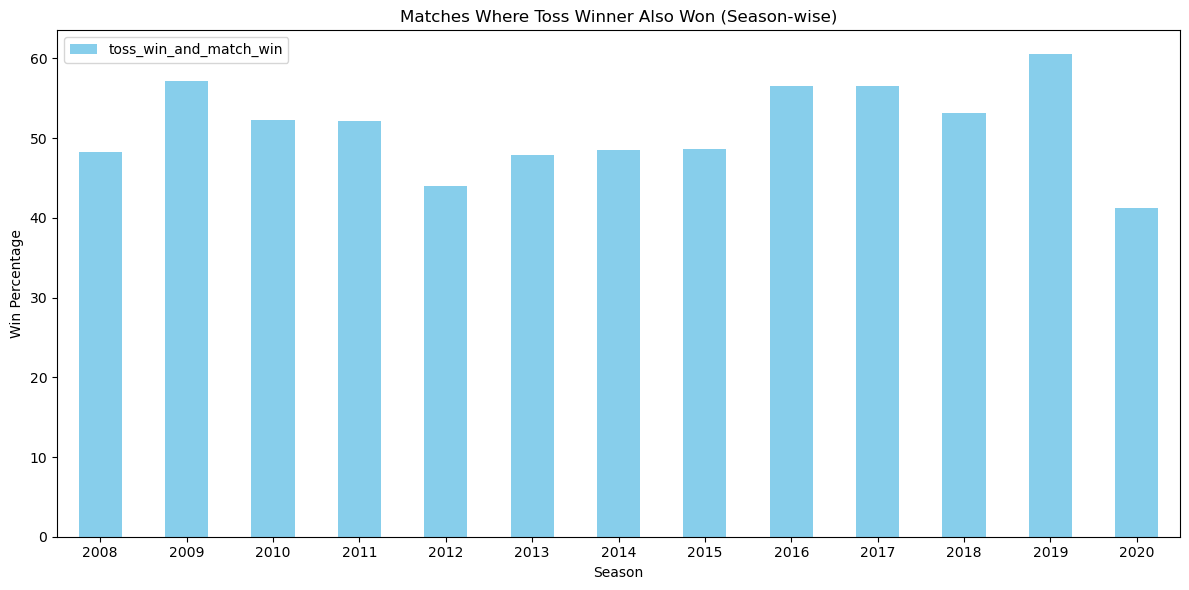

In [84]:
seasonal_stats.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Matches Where Toss Winner Also Won (Season-wise)')
plt.ylabel('Win Percentage')
plt.xlabel('Season')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Analyse which teams have won the tournament the most 

In [87]:
df_sorted = ipl_df.sort_values(['Year', 'date', 'id'])

finals = df_sorted.groupby('Year').tail(1)

In [88]:
title_counts = finals['winner'].value_counts().reset_index()
title_counts.columns = ['Team', 'Titles']

print(title_counts)


                    Team  Titles
0         Mumbai Indians       5
1    Chennai Super Kings       3
2  Kolkata Knight Riders       2
3       Rajasthan Royals       1
4        Deccan Chargers       1
5    Sunrisers Hyderabad       1


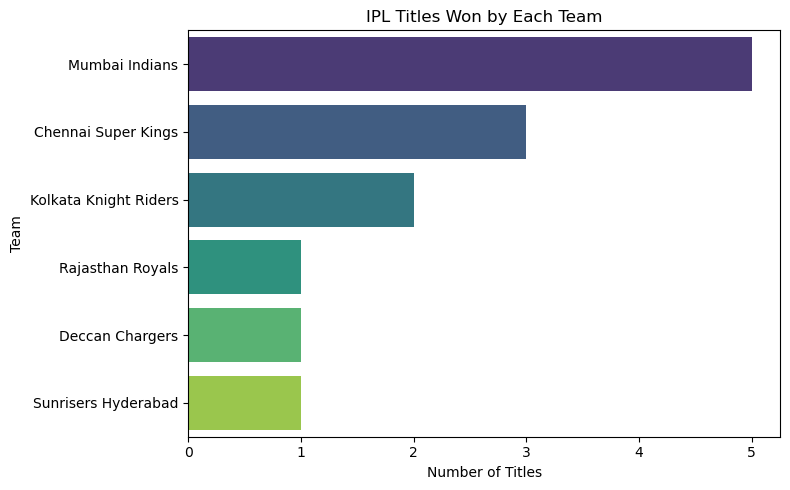

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(data=title_counts, x='Titles', y='Team', palette='viridis')
plt.title('IPL Titles Won by Each Team')
plt.xlabel('Number of Titles')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


In [94]:
# Comparitive analysis of teams

In [69]:
df_sorted = ipl_df.sort_values(['Year', 'date', 'id'])

final_matches = df_sorted.groupby('Year').tail(1)

ipl_champions = final_matches[['Year', 'winner']].reset_index(drop=True)

print(ipl_champions)


    Year                 winner
0   2008       Rajasthan Royals
1   2009        Deccan Chargers
2   2010    Chennai Super Kings
3   2011    Chennai Super Kings
4   2012  Kolkata Knight Riders
5   2013         Mumbai Indians
6   2014  Kolkata Knight Riders
7   2015         Mumbai Indians
8   2016    Sunrisers Hyderabad
9   2017         Mumbai Indians
10  2018    Chennai Super Kings
11  2019         Mumbai Indians
12  2020         Mumbai Indians


In [72]:
ipl_champions = final_matches[['Year', 'winner', 'player_of_match']]
ipl_champions

,Year,winner,player_of_match
13488,2008,Rajasthan Royals,YK Pathan
27083,2009,Deccan Chargers,A Kumble
41572,2010,Chennai Super Kings,SK Raina
58585,2011,Chennai Super Kings,M Vijay
76352,2012,Kolkata Knight Riders,MS Bisla
94504,2013,Mumbai Indians,KA Pollard
108792,2014,Kolkata Knight Riders,MK Pandey
122433,2015,Mumbai Indians,RG Sharma
136529,2016,Sunrisers Hyderabad,BCJ Cutting
150378,2017,Mumbai Indians,KH Pandya
